In [162]:
#librerias
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
# Necesario para graficar superficies 3D
from mpl_toolkits.mplot3d import Axes3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos


In [163]:
# Leer datos separados por una coma
data = np.loadtxt(os.path.join('Data', 'lotes.txt'), delimiter=',')
X, y = data[:, 0], data[:, 1]
m = y.size  # m = numero de ejemplos de entrenamiento


In [164]:

X = np.stack([np.ones(m), X], axis=1)

In [165]:

def costes(X, y, theta):
    m = y.size  # numero de ejemplos de entrenamiento
    error=0
    error =(1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return error


In [166]:
def gradiente(X, y, theta, alpha, iteraciones):
    # Inicializa algunos valores
    m = y.shape[0]  # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(iteraciones):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(costes(X, y, theta))

    return theta, J_history


In [167]:
def graficar(x, y):
    # Grafica los puntos x e y en una figura nueva.

    fig = pyplot.figure()  # abre una nueva figura

    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('precios $ ')
    pyplot.xlabel('superficie M')


In [168]:
def descenso_de_gradiente(x,y,tita0,tita1,alfa,iteraciones):
    m=len(x)
    historial_costes=[]
    for ep in range(iteraciones):
        d_tita0=0
        d_tita1=0
        for i in range(m):
            hipotesis=tita0+tita1*x[i][1]
            d_tita0+=hipotesis-y[i]
            d_tita1+=(hipotesis-y[i])*x[i][1]
            historial_costes.append(costes(x, y, theta=np.array([tita0, tita1])))
        tita0 -=(d_tita0/m)*alfa
        tita1 -=(d_tita1/m)*alfa
    return tita0,tita1,historial_costes

[229.66908942 397.06792083]


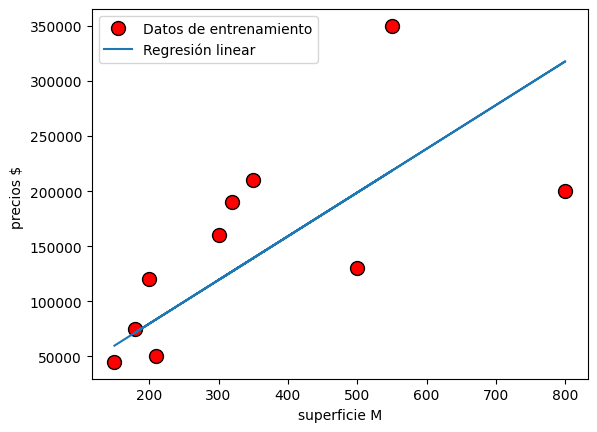

In [169]:
theta=np.zeros(2)
alpha=0.000002
iteraciones=10000
theta,hist_costes=gradiente(X,y,theta,alpha,iteraciones)
graficar(X[:, 1], y)
print(theta)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')
pyplot.legend(['Datos de entrenamiento', 'Regresión linear'])
